<a href="https://colab.research.google.com/github/abidgymnastiar/JobsheetMechineLearning/blob/main/jobsheet_3/tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import package
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# baca data dari file CSV
data = pd.read_csv('insurance.csv')
data.head()
# data.info()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
# Memisahkan variabel bebas (X) dan target (y)
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]  # Fitur
y = data['charges']  # Target

# Tampilkan variabel bebas dan target
print("Variabel Bebas (X):")
print(X.head())

print("\nVariabel Target (y):")
print(y.head())


Variabel Bebas (X):
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest

Variabel Target (y):
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


Soal 1


In [4]:
# Mengidentifikasi variabel target dan variabel bebas
variabel_target = 'charges'
variabel_bebas = ['age', 'bmi', 'children']

# Mengkodekan variabel kategorikal (sex, smoker, region) jika diperlukan
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Memisahkan fitur dan target
X = data.drop(columns=[variabel_target])
y = data[variabel_target]

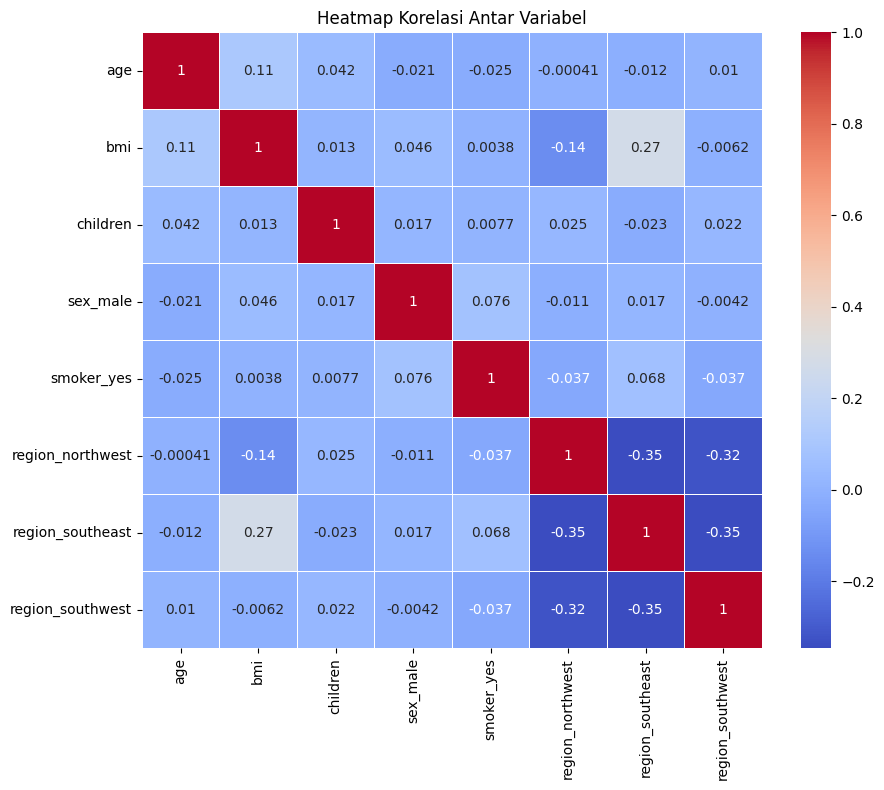

In [26]:
# Import package tambahan untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi antar variabel
corr_matrix = X.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Melakukan feature scaling
# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.values.reshape(-1, 1))

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# Membuat model regresi linier berganda
model = LinearRegression()

# Melatih model pada data latih
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Menilai model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)



Evaluasi Model:
Mean Squared Error (MSE): 0.23051639042367172
Mean Absolute Error (MAE): 0.3424439883240016
R-squared (R²): 0.769611805436901


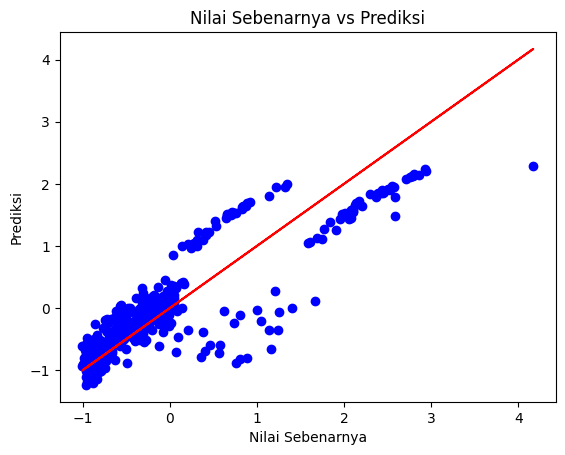

In [28]:
# Visualisasi hasil prediksi
plt.scatter(y_test, y_pred,color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Nilai Sebenarnya vs Prediksi')
plt.show()